In [2]:
import json
from jsonpath_ng.ext import parse
import networkx
import argparse

In [243]:
def load_json_data(input_file):
    try:
        with open(input_file, 'r') as data_json:
            source_data = json.load(data_json)
        return source_data
    except FileNotFoundError:
        print(f"Error: The file '{input_file}' was not found.")
        return None

# Create an argument parser
parser = argparse.ArgumentParser(description="Load JSON data from a file")

# Add arguments for input file and mapping configuration file
parser.add_argument("input_file", help="Path to the input JSON data file")
parser.add_argument("map_cfg_file", help="Path to the mapping configuration file")


# Parse the command-line arguments
#args = parser.parse_args()

# Specify the input file path here
input_file = './people2.json'  # Replace with the actual file path
map_cfg_file = './people_map_cfg2.json'

# Load data from the specified input file
source_data = load_json_data(input_file)
mapping_config = load_json_data(map_cfg_file)


In [103]:
mapping_config

{'schema-map': {'nodes': [{'node-type': '$.People',
    'label': 'People',
    'node-id': 'id',
    'node-properties': {'Name': 'Name', 'Age': 'Age', 'Gender': 'Gender'}},
   {'node-type': '$.Movies',
    'label': 'Movies',
    'node-id': 'id',
    'node-properties': {'Title': 'Title', 'Director': 'Director'}}],
  'edges': [{'edge-type': '$.People.friends',
    'relationship': 'IS_FRIENDS_WITH',
    'direction': 'Out',
    'edge-id': '',
    'edge-properties': '',
    '_source': '$.People.id',
    '_target': '$.People.friends'}]}}

In [5]:
import networkx as nx
property_graph = nx.Graph()

In [7]:
property_graph.add_node(1,label='People',type='People')

In [10]:
property_graph.nodes.data()

NodeDataView({1: {'label': 'People', 'type': 'People'}})

In [11]:
property_graph.remove_node(1)

In [ ]:
# add nodes to the property graph
for element in source_data[mapping_config['schema-map']['nodes'][0]['label']]:
    node = {
        "node": {
            "id": element[mapping_config['schema-map']['nodes'][0]['node-id']],
            "label": mapping_config['schema-map']['nodes'][0]['label'],
            "properties":{} #mapping_config['schema-map']['nodes'][0]['node-properties']
        }
    }

    # Map properties to the node
    for property_name, property_mapping in mapping_config['schema-map']['nodes'][0]['node-properties'].items():
        property_value = element
        for key in property_mapping.split('.'):
            property_value = property_value.get(key, None)
            if property_value is None:
                break

        if property_value is not None:
            node["node"]["properties"][property_name] = {
                "datatype": "string",  # comment : modify this based on the actual data types
                "data value": property_value
            }

    property_graph["graph"]["nodes"].append(node)

In [ ]:
jsonpath_expression = parse("$.People[*]..[id,Name,Age,Gender]")
jsonpath_expression = parse("{root_node}[*]..[id,Name,Age,Gender]")

for match in jsonpath_expression.find(people):
    print(match.value)

In [177]:
nodes = mapping_config['schema-map']['nodes']
mydata = []
for node in nodes:
    jsargs = [node['node-id']]
    #print(node['node-properties'].keys())
    jsargs.extend(list(node['node-properties'].keys()))
    print(jsargs)
    # "$.People..[id,Name,Age,Gender]"
    js1 = parse("%s..%s" % (node['node-type'],jsargs))
    '''
    for match in js1.find(source_data):
        #print(match['label'].value)
        print(match.value)
        mydata.append(match.value)
        #print(match.value[0].id)
    '''
    matches = [match.value for match in js1.find(source_data)]
    print(matches)

['id', 'Name', 'Age', 'Gender']
[1, 'Max', 20, 'Male', 2, 'Alice', 25, 'Female', 3, 'Bob', 22, 'Male', 4, 'Joe', 52, 'Male', 5, 'Van Dyke', 42, '', 6, ['Ken', 'Kennedy', 'Kenneth'], 'Male', 7, ['Sally'], '19', 'Female', 8, ['Ka‘anapali'], '19', 'Not Stated']
['id', 'Title', 'Director']
[1, 'Lord Of The Rings', 'Peter Jackson']


In [190]:
property_graph.clear()

In [230]:
my_node = {"id":1,"name":"test"}
js = parse("id")
for m in js.find(my_node):
    print(m)

DatumInContext(value=1, path=Fields('id'), context=DatumInContext(value={'id': 1, 'name': 'test'}, path=This(), context=None))


In [251]:
#nodes
nodes = mapping_config['schema-map']['nodes']
mynodes = []
for i in range(len(nodes)):
    nodeid = [nodes[i]['node-id']]
    node_props = nodes[i]['node-properties']
    #print(nodeid,node_props)
    label = nodes[i]['label']
    
    js1 = parse("%s" % (nodes[i]['node-type']))
    #print(js1)
    for match in js1.find(source_data):
        for i in list(match.value):
            nodedata = i
            print(node_data)
            break



    

[{'id': 1, 'Name': 'Max', 'Age': 20, 'Gender': 'Male', 'friends': [2, 3]}, {'id': 2, 'Name': 'Alice', 'Age': 25, 'Gender': 'Female', 'friends': [1]}, {'id': 3, 'Name': 'Bob', 'Age': 22, 'Gender': 'Male', 'friends': [1, 4]}, {'id': 4, 'Name': 'Joe', 'Age': 52, 'Gender': 'Male', 'friends': [3]}, {'id': 5, 'Name': 'Van Dyke', 'Age': 42, 'Gender': '', 'friends': [2]}, {'id': 6, 'Name': ['Ken', 'Kennedy', 'Kenneth'], 'Age': 'unknown', 'Gender': 'Male', 'friends': []}, {'id': 7, 'Name': ['Sally'], 'Age': '19', 'Gender': 'Female', 'friends': [2, 1, 3, 6, 5, 4]}, {'id': 8, 'Name': ['Ka‘anapali'], 'Age': '19', 'Gender': 'Not Stated', 'friends': [5, 4]}]


In [191]:
# nodes
nodes = mapping_config['schema-map']['nodes']
mydata = []
for node in nodes:
    jsargs = [node['node-id']]
    label = node['label']
    
    js1 = parse("%s..%s" % (node['node-type'],jsargs))
   
    matches = [match.value for match in js1.find(source_data)]
    print(matches)

   
    for i in range(len(matches)):
        jsargs = []
        jsargs.extend(list(node['node-properties'].keys())) # may be a problem if some elements don't have all fields
        js2 = parse("%s[%s]..%s" % (node['node-type'],i,jsargs)) 
        m2 = [m2.value for m2 in js2.find(source_data)]
        data_dict = dict(zip(node['node-properties'].keys(), m2))
        property_graph.add_node("%s_%s" % (label,matches[i]),label=label,properties=data_dict)

    

People
[1, 2, 3, 4, 5, 6, 7, 8]
1
2
3
4
5
6
7
8
Movies
[1]
1


In [192]:
property_graph.nodes.data()

NodeDataView({'People_1': {'label': 'People', 'properties': {'Name': 'Max', 'Age': 20, 'Gender': 'Male'}}, 'People_2': {'label': 'People', 'properties': {'Name': 'Alice', 'Age': 25, 'Gender': 'Female'}}, 'People_3': {'label': 'People', 'properties': {'Name': 'Bob', 'Age': 22, 'Gender': 'Male'}}, 'People_4': {'label': 'People', 'properties': {'Name': 'Joe', 'Age': 52, 'Gender': 'Male'}}, 'People_5': {'label': 'People', 'properties': {'Name': 'Van Dyke', 'Age': 42, 'Gender': ''}}, 'People_6': {'label': 'People', 'properties': {'Name': ['Ken', 'Kennedy', 'Kenneth'], 'Age': 'Male'}}, 'People_7': {'label': 'People', 'properties': {'Name': ['Sally'], 'Age': '19', 'Gender': 'Female'}}, 'People_8': {'label': 'People', 'properties': {'Name': ['Ka‘anapali'], 'Age': '19', 'Gender': 'Not Stated'}}, 'Movies_1': {'label': 'Movies', 'properties': {'Title': 'Lord Of The Rings', 'Director': 'Peter Jackson'}}})

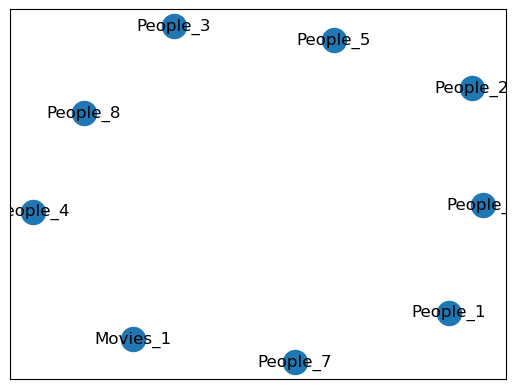

In [193]:
import matplotlib.pyplot as plt
nx.draw_networkx(property_graph,with_labels=True)
plt.show()

In [96]:
node['node-properties'].keys()

dict_keys(['Name', 'Age', 'Gender'])

In [83]:
node

{'node-type': '$.People',
 'label': 'People',
 'node-id': 'id',
 'node-properties': {'Name': 'Name', 'Age': 'Age', 'Gender': 'Gender'}}

In [79]:
js = parse("$.People.Parent[*]")
for match in js.find(source_data):
    print(match)

In [75]:
js

Child(Child(Child(Root(), Fields('People')), Fields('Parent')), Slice(start=None,end=None,step=None))

In [13]:
nodes

[{'node-type': '$.People',
  'label': 'People',
  'node-id': '$.People.id',
  'node-properties': {'Name': '$.People.Name',
   'Age': '$.People.Age',
   'Gender': '$.People.Gender'}}]

In [19]:
node

{'node-type': '$.People',
 'label': 'People',
 'node-id': '$.People.id',
 'node-properties': {'Name': '$.People.Name',
  'Age': '$.People.Age',
  'Gender': '$.People.Gender'}}

In [38]:
node

{'node-type': '$.People',
 'label': 'People',
 'node-id': '$.People.id',
 'node-properties': {'Name': '$.People.Name',
  'Age': '$.People.Age',
  'Gender': '$.People.Gender'}}

In [49]:
print("{}..[{}]".format(node['node-type'],node['node-id']-node['node-type']))

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [194]:
keys=["a","b","c"]
values=[1,2]
kv = dict(zip(keys,values))

In [195]:
kv

{'a': 1, 'b': 2}

In [231]:
with open('../movies_pgraph.json', 'r') as data_json:
            source_data = json.load(data_json)

In [235]:
pgraph = nx.Graph()

In [236]:
for node in source_data['graph']['nodes']:
    print (node['node']['id']) 
    pgraph.add_node(node['node']['id'],label=node['node']['label'],properties=node['node']['properties'])

The Murder of Nicole Brown Simpson
Bad Boys for Life
Dolittle
A Fall from Grace
The Gentlemen
The Turning
The Last Full Measure
John Henry
1
2
3
4


In [239]:
pgraph.nodes

NodeView(('The Murder of Nicole Brown Simpson', 'Bad Boys for Life', 'Dolittle', 'A Fall from Grace', 'The Gentlemen', 'The Turning', 'The Last Full Measure', 'John Henry', 1, 2, 3, 4))

In [240]:
for edge in source_data['graph']['edges']:
    print (edge['edge']['id']) 
    pgraph.add_edge(edge['edge'])

1


TypeError: add_edge() missing 1 required positional argument: 'v_of_edge'

In [252]:
with open('./books_map_cfg.json', 'r') as data_json:
            source_data = json.load(data_json)

In [253]:
source_data

{'schema-map': {'nodes': [{'node-type': '$.Books',
    'label': 'Books',
    'node-id': 'isbn',
    'node-properties': {'Title': {'data_type': 'string',
      'data_value': 'title'},
     'Published Year': {'data_type': 'numeric',
      'data_value': 'published_year'},
     'Genere': {'data_type': 'list', 'data_value': 'genere'}}},
   {'node-type': '$.Authors',
    'label': 'Authors',
    'node-id': 'name',
    'node-properties': {'Birth Year': {'data_type': 'numeric',
      'data_value': 'birth_year'},
     'Death Year': {'data_type': 'numeric', 'data_value': 'death_year'},
     'Country of Birth': {'data_type': 'string',
      'data_value': 'country_of_birth'}}}],
  'edges': [{'edge-type': '',
    'relatioship': 'Created',
    'direction': 'Out',
    'edge-id': '',
    'edge-properties': '',
    '_source': 'name',
    '_source_type': 'Authors',
    '_target': 'author',
    '_target_type': 'Books'}]}}

In [255]:
source_data['schema-map']['edges'][0]

{'edge-type': '',
 'relatioship': 'Created',
 'direction': 'Out',
 'edge-id': '',
 'edge-properties': '',
 '_source': 'name',
 '_source_type': 'Authors',
 '_target': 'author',
 '_target_type': 'Books'}

In [258]:
source_node_type = source_data['schema-map']['edges'][0]['_source_type']
target_node_type = source_data['schema-map']['edges'][0]['_target_type']
source_node_type,target_node_type

('Authors', 'Books')

In [ ]:
src_nodes = [node for node in property_graph['graph']['nodes'] if node['label'] == source_node_type]
trgt_nodes = [node for node in property_graph['graph']['nodes'] if node['label'] == source_node_type]
for src_node in src_nodes:
    for trgt_node in trgt_nodes:
        if src_node['_source'] == trgt_node['_target']:
            add_edge(src_node, trgt_node)